In [120]:
import numpy as np
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [121]:
from keras.models import load_model

model = load_model('CNN-Model.h5')

In [122]:
class_names = ["mobil", "motor"]

In [127]:
data_path = 'E:\KULIAH\Semester 6\DEEP LEARNING\Research\data test'

In [128]:
class_test= os.listdir(data_path)
class_test

['345642813_1259550098268468_1759196411170290958_n.jpg',
 '345892072_649481460352880_5186213986861953498_n.jpg',
 '345919980_1516874402052988_677323640220092558_n.jpg',
 '346054333_1287917171761509_1442104686262842570_n.jpg',
 '346286665_1564106377406660_8969689640807138399_n.jpg',
 '346630230_580717624205637_4174050055484705793_n.jpg']

In [142]:
class_test = np.random.choice(class_test, size=1, replace=True)

1/1 [==============================] - 0s 486ms/step


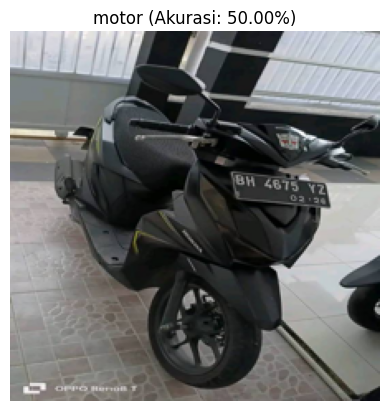

In [147]:
for img_file in class_test:
    # Memuat gambar
    img_path = os.path.join(data_path, img_file)
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array= img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    # Menampilkan gambar dan label prediksi
    if prediction.shape[1] == 1:
        label = 'motor'
        accuracy = prediction[0][0] * 100
    else:
        if prediction[0][0] > prediction[0][1]:
            label = 'mobil'
            accuracy = prediction[0][0] * 100
        else:
            label = 'motor'
            accuracy = prediction[0][1] * 100

plt.imshow(img_array[0,:,:,:])
plt.title(label + " (Akurasi: {:.2f}%)".format(accuracy))
plt.axis('off')
plt.show()